In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def overlay_images(source, overlay):
    alpha = cv2.cvtColor(overlay, cv2.COLOR_RGB2GRAY)[:,:] > 0
    mask = np.dstack((alpha, alpha, alpha))

    h, w = overlay.shape[:2]
    source[0:h, 0:w] = (overlay * mask) + (source[0:h, 0:w] * ~mask)

    return source

In [59]:
positionMapping = {
    "banner": np.float32([[280,33], [1400,33], [280,90], [1400,90]]),
    1: np.float32([[816,165], [948,165], [836,209], [974,209]]),
    2: np.float32([[842,224], [982,224], [866,272], [1010,272]]),
    3: np.float32([[873,287], [1019,287], [899,343], [1052,343]]),
    4: np.float32([[907,359], [1061,359], [936,421], [1098,421]]),
    5: np.float32([[945,438], [1108,438], [978,509], [1150,509]]),
    6: np.float32([[989,529], [1163,529], [1026,607], [1206,607]]),
    7: np.float32([[1036,632], [1222,630], [1080,724], [1276,724]]),
    8: np.float32([[1093,749], [1292,747], [1140,854], [1353,851]]),
}

In [60]:
def replacePosition(position, src, overlay):
    src_height, src_width = src.shape[:2]
    src_points = positionMapping.get(position)

    overlay_height, overlay_width = overlay.shape[:2]
    overlay_points = np.float32([[0,0], [overlay_width,0], [0,overlay_height], [overlay_width,overlay_height]])

    homography, mask = cv2.findHomography(overlay_points, src_points, cv2.RANSAC, 5.0)
    overlay_warped = cv2.warpPerspective(overlay, homography, (src_width, src_height))

    result = overlay_images(src, overlay_warped)
    return result

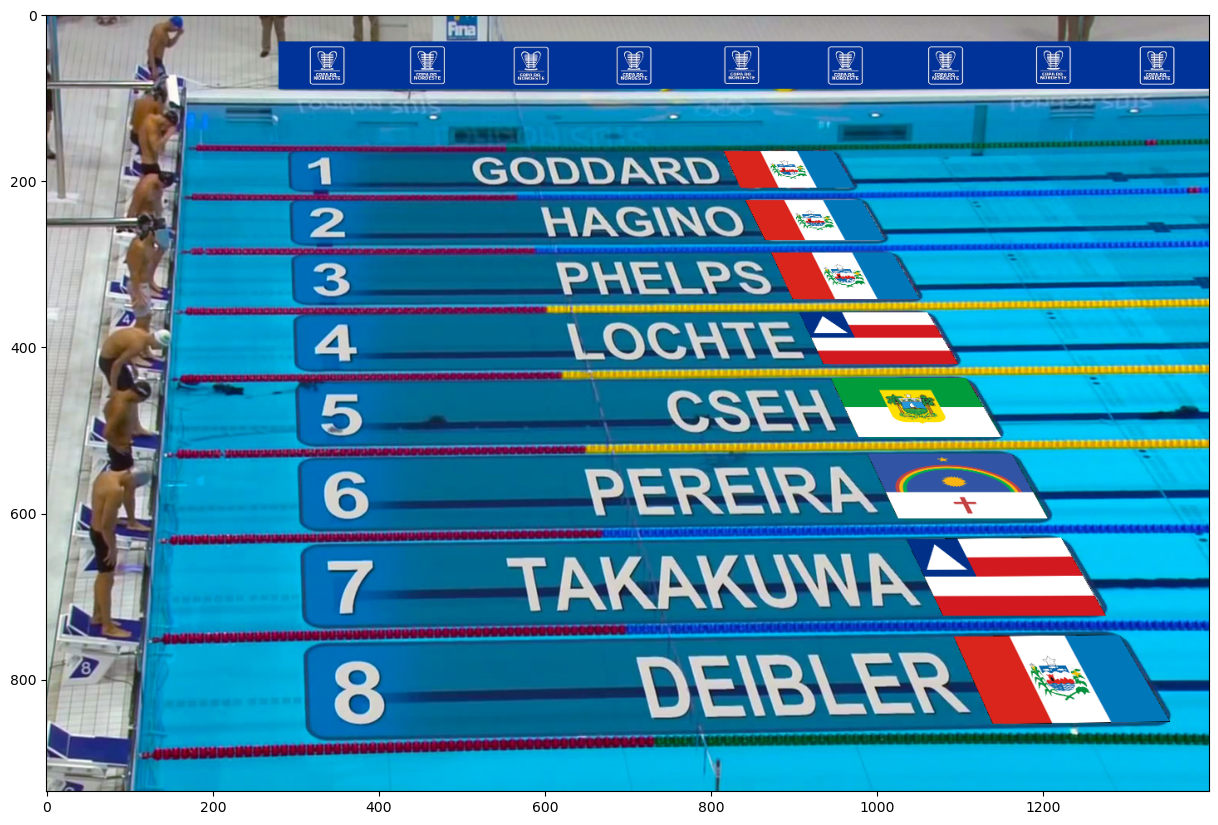

In [63]:
import random

piscina = cv2.imread('images/piscina.jpg')
banner = cv2.imread('images/banner.jpg')
estados = [
    cv2.imread('images/alagoas.png'),
    cv2.imread('images/bahia.png'),
    cv2.imread('images/ceara.png'),
    cv2.imread('images/maranhao.png'),
    cv2.imread('images/paraiba.png'),
    cv2.imread('images/pernambuco.png'),
    cv2.imread('images/piaui.png'),
    cv2.imread('images/rgnorte.png'),
    cv2.imread('images/sergipe.png')
]

result = replacePosition('banner', piscina, banner)
for i in range(1,8+1):
    result = replacePosition(i, result, random.choice(estados))

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))